<a href="https://colab.research.google.com/github/polinakochneva1/me_labs_house/blob/main/lab2/%D0%BC%D0%BE%D1%8F%20%D0%BB%D0%B0%D0%B1%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [4]:
!pip3 install scikit-learn

In [6]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! kaggle datasets download arnabchaki/data-science-salaries-2023

  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 50.2MB/s]


In [9]:
! unzip data-science-salaries-2023.zip

Archive:  data-science-salaries-2023.zip
  inflating: ds_salaries.csv         


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [11]:
df = pd.read_csv('ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [12]:
df['salary_currency'].describe # ваш код здесь

<bound method NDFrame.describe of 0       EUR
1       USD
2       USD
3       USD
4       USD
       ... 
3750    USD
3751    USD
3752    USD
3753    USD
3754    INR
Name: salary_currency, Length: 3755, dtype: object>

In [13]:
mean = df['salary_in_usd'].mean()
mean

137570.38988015978

In [14]:
median = df['salary_in_usd'].median()
median

135000.0

In [15]:
mode = df['salary_in_usd'].mode()
mode

0    100000
Name: salary_in_usd, dtype: int64

In [16]:
min = df['salary_in_usd'].min()
min

5132

In [17]:
max = df['salary_in_usd'].max()
max

450000

In [18]:
std = df['salary_in_usd'].std()
std

63055.6252782241

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [19]:
q1 = df['salary_in_usd'].quantile(0.25)
q1

95000.0

In [20]:
q2 = df['salary_in_usd'].quantile(0.50)
q2

135000.0

In [21]:
q3 = df['salary_in_usd'].quantile(0.75)
q3

175000.0

In [22]:
# Рассчитываем первый и третий квартили
q1 = df['salary_in_usd'].quantile(0.25)
q3 = df['salary_in_usd'].quantile(0.75)

# Рассчитываем межквартильный размах (IQR)
iqr = q3 - q1

# Теперь 'iqr' содержит значение межквартильного размаха
print("IQR:", iqr)


IQR: 80000.0


Какие выводы можно сделать исходя из полученных статистических данных?

Мы видим, что медиана и среднее значение очень отличаются, они лежат очень близко к максимальному значению. Поэтому можно сделать вывод, что распределение - ненормальное(склонено вправо)

##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

**По гистограме видно, что все года суммарно равны(примерно), значит машину можно обучать.**

Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

In [23]:
import plotly.express as px

# Assuming 'df' is your DataFrame

# Histogram for 'experience_level' and 'salary'
fig_histogram_experience = px.histogram(df, x='experience_level', y='salary')
fig_histogram_experience.show()

# Box plot for 'work_year'
fig_box_work_year = px.box(df, y='work_year')
fig_box_work_year.show()

# Box plot for 'employment_type' and 'salary'
fig_box_employment_salary = px.box(df, x='employment_type', y='salary')
fig_box_employment_salary.show()

# Scatter plot for 'remote_ratio', 'salary_in_usd', and color by 'company_size'
fig_scatter_remote_salary = px.scatter(df, x='remote_ratio', y='salary_in_usd', color='company_size')
fig_scatter_remote_salary.show()


<ipython-input-24-822b8bec8dcf>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



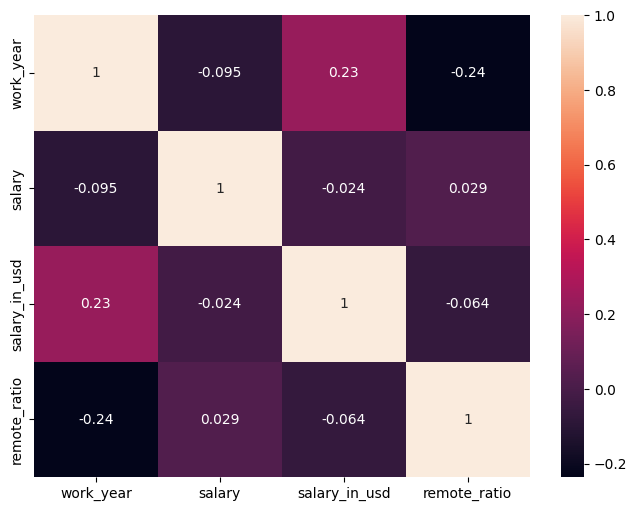

In [24]:
# Вычисление корреляционной матрицы
correlation_matrix = df.corr()

# Визуализация корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()